In [129]:
import pandas as pd
import numpy as np

np.random.seed(42) #Create sample synthetic dataset

#Creating a synthetic dataset
n_customers = 1000
ages = np.random.randint(18, 70, size = n_customers)
incomes = np.random.randint(20000, 120000, size = n_customers)
spending_scores = np.random.randint(1, 100, size = n_customers)
categories = np.random.choice(['Electronics', 'Clothing', 'Groceries', 'Home Appliances'], size = n_customers)

#Making the dataframe
df = pd.DataFrame ({ 'Customer_ID' : range(1, n_customers + 1), 'Age' : ages, 'Annual_Income' : incomes, 'Spending_Score' : spending_scores, 'Product_Category' : categories})
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Product_Category
0,1,56,54674,44,Electronics
1,2,69,55854,49,Home Appliances
2,3,46,66271,75,Clothing
3,4,32,93688,61,Clothing
4,5,60,58518,67,Clothing


In [131]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

#One-hot encoding
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['Age', 'Annual_Income','Spending_Score']),
        ('cat', OneHotEncoder(), ['Product_Category'])
    ])

#Defining KMeans model
kmeans = KMeans(n_clusters = 4, random_state = 42)

#Creating the pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor), 
                             ('kmeans', kmeans)])

#Fitting the model
pipeline.fit(df)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual_Income',
                                                   'Spending_Score']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Product_Category'])])),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412:

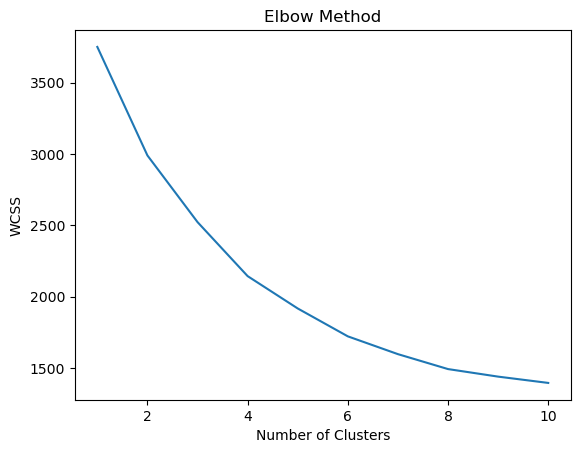

In [133]:
import matplotlib.pyplot as plt

#Calculating WCSS for different K values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(preprocessor.fit_transform(df))
    wcss.append(kmeans.inertia_)

#Elbow Graphs
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()



In [134]:
# 
df['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids[:, :3] = preprocessor.transformers_[0][1].inverse_transform(centroids[:, :3])

#I was running into issues and was recommended to use the get_features_names_out so that my values would no longer appear as negative and my values would actually appear.
columns = preprocessor.transformers_[0][1].get_feature_names_out(['Age', 'Annual_Income', 'Spending_Score']).tolist() + \
          preprocessor.transformers_[1][1].get_feature_names_out(['Product_Category']).tolist()

centroids_df = pd.DataFrame(centroids, columns=columns)
centroids_df


,Age,Annual_Income,Spending_Score,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Home Appliances
0,27.214286,45831.098214,25.214286,0.267857,0.151786,0.321429,2.589286e-01
1,56.206186,101265.628866,75.412371,0.175258,0.278351,0.288660,2.577320e-01
2,60.772727,43898.763636,66.363636,0.254545,0.318182,0.200000,2.272727e-01
3,33.351852,96409.648148,19.509259,0.166667,0.212963,0.231481,3.888889e-01
4,40.206349,67986.634921,32.285714,0.031746,0.952381,0.015873,5.551115e-17
5,45.044444,62239.044444,78.866667,0.166667,0.144444,0.355556,3.333333e-01
6,27.676471,95151.715686,70.872549,0.362745,0.254902,0.196078,1.862745e-01
7,58.228070,95860.035088,23.263158,0.315789,0.245614,0.210526,2.280702e-01
8,54.725000,41962.341667,21.558333,0.275000,0.133333,0.316667,2.750000e-01
9,28.773810,40195.333333,79.083333,0.238095,0.214286,0.190476,3.571429e-01
